<a href="https://colab.research.google.com/github/sberniz/FlyngSaferThanBefore/blob/master/Santiago_Berniz_Flying_has_gotten_safer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Has Aviation Gotten Safer?***



In [1]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
#Library Imports 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px #Plotly Express
import plotly.io as pio #To convert to html
import plotly.graph_objects as go #plotly go
import chart_studio #chartstudio
import chart_studio.plotly as py
username = 'sberniz' #username
api_key = '5Ob9KVbdyKgJcdT3hEFP' #api key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key) #connect to api

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Lets load Dataset for all crashes since 1908 until 2019

In [3]:
#load plane crash data worldwide from 1908 till 2019
plane_crash = pd.read_csv('https://raw.githubusercontent.com/sberniz/FlyngSaferThanBefore/master/data/plane_crash_2019.csv')
plane_crash.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [4]:
plane_crash['Date'] = pd.to_datetime(plane_crash['Date'],infer_datetime_format=True) #convert the Date column to datetime format
plane_crash.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [5]:
#Creates a year column/feature to calculate accidents per year
plane_crash['year'] = plane_crash['Date'].dt.year
plane_crash.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,1913


##Here We extract all Airshow and Military accidents since their risky maneuvers are more prone to accidents, and we are comparing General aviation and Commercial aviation. 

In [6]:
#Filters out Airshow, and Military planes, since the risky maneuvers of both will interfere with Data for regular general aviation and passanger flights
plane_crash = plane_crash[((plane_crash['Operator'].str.contains('Military',na=False,regex=True)) == False) & ((plane_crash['Route'].str.contains('Airshow',na=False,regex=True)) == False) & ((plane_crash['Route'].str.contains('Air show',na=False,regex=True)) == False)]
print(plane_crash.shape)
plane_crash.head()

(4215, 18)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
17,1917-06-17,NaN,"Near Yarmouth, England",NaN,NaN,NaN,Zepplin LZ-95 (air ship),L-48,NaN,16.0,NaN,NaN,14.0,NaN,NaN,0.0,Shot down by aircraft.,1917
23,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Carl Smith was killed when his mail plane feet...,1918
24,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,1919
25,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...,1919


In [7]:
#add percentage fatalities per flight. and Checks it has been added
plane_crash['percentage fatalities'] = (plane_crash['Fatalities']  / plane_crash['Aboard'])*100
plane_crash.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,100.0
17,1917-06-17,NaN,"Near Yarmouth, England",NaN,NaN,NaN,Zepplin LZ-95 (air ship),L-48,NaN,16.0,NaN,NaN,14.0,NaN,NaN,0.0,Shot down by aircraft.,1917,87.5
23,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Carl Smith was killed when his mail plane feet...,1918,100.0
24,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,1919,100.0
25,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...,1919,100.0


In [8]:
#Creates new dataframe with Only those accidents where Fatalitie was 100%
#everyone Invlolved Died. 
plane_crash_total_fatalities = plane_crash[plane_crash['percentage fatalities'] == 100]
print(plane_crash_total_fatalities.shape)
plane_crash_total_fatalities.head()

(2586, 19)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,100.0
23,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Carl Smith was killed when his mail plane feet...,1918,100.0
24,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,1919,100.0
25,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...,1919,100.0
27,1919-08-02,NaN,"Verona, Italy",Caproni Company,NaN,Venice Taliedo,Caproni Ca.48,NaN,NaN,14.0,12.0,2.0,14.0,12.0,2.0,0.0,As the plane was passing over Verona the wings...,1919,100.0


In [9]:
#Number of Plane crashes with 0 Fatalities
plane_crash_no_fat = plane_crash[plane_crash['Fatalities'] == 0 ]
print(plane_crash_no_fat.shape)
plane_crash_no_fat.head()

(67, 19)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
30,1919-10-20,NaN,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,NaN,NaN,De Havilland DH-4,G-EAHG,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Crashed into the sea while attempting to land ...,1919,NaN
117,1926-10-21,13:15,English Channel,Imperial Airways,NaN,Croydon - Paris,Handley Page W-10,G-EBMS,W10/3,12.0,10.0,2.0,0.0,0.0,0.0,0.0,The plane was on a flight from London to Paris...,1926,0.0
120,1927-01-12,NaN,"Estaires, France",Fokker,NaN,Delivery flight,Fokker F-VII,G-EBPL,4938,0.0,0.0,2.0,0.0,0.0,2.0,0.0,The flight crew encountered poor weather condi...,1927,NaN
289,1932-08-12,NaN,"Beyrouth, Lebanon",Air Orient,NaN,Marseille - Naples - Beyrouth - Saigon,CAMS 53,F-AIQY,07,7.0,3.0,4.0,0.0,0.0,0.0,0.0,Crrashed and sunk while landing in Beyrough ha...,1932,0.0
323,1933-11-10,NaN,"Moriarty, New Mexico",Trans Continental and Western Air,NaN,NaN,Northrop Delta,NC12292,03,1.0,0.0,1.0,0.0,0.0,0.0,0.0,The pilot bailed out after the engine caught f...,1933,0.0


In [10]:
#Plane Crashes where Fatalities were not total 
plane_crash_partial_fat = plane_crash[plane_crash['percentage fatalities'] < 100]
print(plane_crash_no_fat.shape)
plane_crash_partial_fat.head()

(67, 19)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,year,percentage fatalities
17,1917-06-17,NaN,"Near Yarmouth, England",NaN,NaN,NaN,Zepplin LZ-95 (air ship),L-48,NaN,16.0,NaN,NaN,14.0,NaN,NaN,0.0,Shot down by aircraft.,1917,87.5
35,1920-04-10,NaN,"Newark, New Jersey",US Aerial Mail Service,NaN,NaN,Curtiss R-4LM,49,NaN,2.0,1.0,1.0,1.0,0.0,1.0,0.0,After a fire erupted in flight the pilot decid...,1920,50.0
36,1920-04-11,NaN,"Heller Field, New Jersey",US Aerial Mail Service,NaN,NaN,Curtiss JN-4H,44,NaN,2.0,1.0,1.0,1.0,0.0,1.0,0.0,The aircraft crashed while on approach for unk...,1920,50.0
37,1920-05-12,NaN,"Oskaloosa, Iowa",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,79,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"In worsening weather conditions, the pilot los...",1920,50.0
49,1920-12-14,12:15,"London, England",Handley Page Transport,NaN,London - Paris,Handley Page HP-16,G-EAMA,HP-25,8.0,6.0,2.0,4.0,2.0,2.0,0.0,The plane failed to gain altitude after taking...,1920,50.0


#Now some Exploratory Graphs to see how the accidents compare to the fatalities and total fatalities

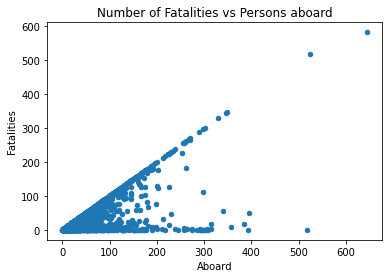

In [11]:
#Exploratory graph to check for Fatalities vs Personsa board.
plane_crash.plot.scatter('Aboard','Fatalities',title="Number of Fatalities vs Persons aboard");

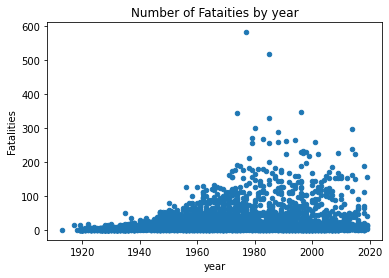

In [12]:
#compares Fatalities with Years couple of outliers on scotterplot by 1980
plane_crash.plot.scatter('year','Fatalities',title="Number of Fataities by year");

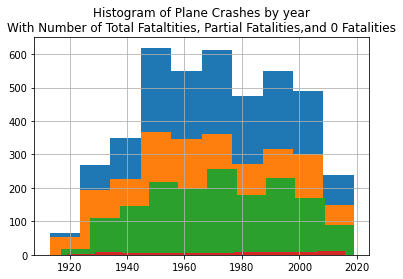

In [13]:
#Histogram of How the accidents compare per year
plane_crash['year'].hist(bins=10)
plane_crash_total_fatalities['year'].hist()
plane_crash_partial_fat['year'].hist()
plane_crash_no_fat['year'].hist()

plt.title("Histogram of Plane Crashes by year\nWith Number of Total Fataltities, Partial Fatalities,and 0 Fatalities")
plt.show()

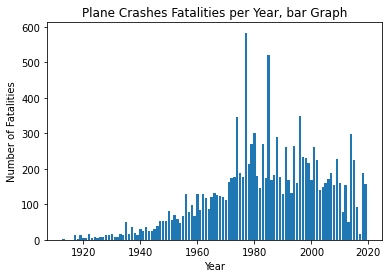

In [14]:
#Matplotlib just to check rate of fataltiies per year 
fig, ax = plt.subplots()
ax.bar(x=plane_crash['year'], height=plane_crash['Fatalities'])
ax.set_title("Plane Crashes Fatalities per Year, bar Graph")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Fatalities")
plt.show()

#Create DataFrames for Explanatory Visualization

In [15]:
#calculate # of people per year that were involved in a plane crash yearly groupby
plane_crash_aboard_year = plane_crash.groupby(['year'])['Aboard'].sum().reset_index()
plane_crash_aboard_year.tail()

,year,Aboard
99,2015,652.0
100,2016,881.0
101,2017,119.0
102,2018,898.0
103,2019,287.0


In [16]:
#Number of Fatalities per year group
plane_crash_fatalities_year = plane_crash.groupby(['year'])['Fatalities'].sum().reset_index()
plane_crash_fatalities_year.tail()

,year,Fatalities
99,2015,615.0
100,2016,493.0
101,2017,88.0
102,2018,533.0
103,2019,249.0


In [17]:
#Function to group number of crashes and crashes with fatalities, partial and no fatalities
def grouping(df):
  dupes = {}
  for c in df:
    if c == 'year':
      gb = df.groupby(c).size()
      dupes[c] = gb[gb >= 0]
  return dupes

In [18]:
#Total Fatalities per year Number of crashes where fatalities were total
total_fatalities = {}
total_fat_per_year = grouping(plane_crash_total_fatalities)
total_fat_per_year['total_fatalities'] = total_fat_per_year.pop('year')
total_crash_fat_per_year = pd.DataFrame(total_fat_per_year).reset_index()
print(total_crash_fat_per_year.shape)
total_crash_fat_per_year.head()

(103, 2)


,year,total_fatalities
0,1913,1
1,1918,1
2,1919,7
3,1920,14
4,1921,10


In [19]:
#Partial Fatalities per year Number of crashes where fatalities were partial
partial_fat_per_year = grouping(plane_crash_partial_fat)
partial_fat_per_year['partial_fatalities'] = partial_fat_per_year.pop('year')
partial_crash_fat_per_year = pd.DataFrame(partial_fat_per_year).reset_index()
print(partial_crash_fat_per_year.shape)
partial_crash_fat_per_year.head()

(98, 2)


,year,partial_fatalities
0,1917,1
1,1920,4
2,1922,2
3,1923,3
4,1926,3


In [20]:
#0 Fatalities crashes per year Number of crashes where fatalities were 0
zero_fat_per_year = grouping(plane_crash_no_fat)
zero_fat_per_year['zero_fatalities'] = zero_fat_per_year.pop('year')
plane_crash_zerofat_per_year = pd.DataFrame(zero_fat_per_year).reset_index()
print(plane_crash_zerofat_per_year.shape)
plane_crash_zerofat_per_year.head()

(45, 2)


,year,zero_fatalities
0,1919,1
1,1926,1
2,1927,1
3,1932,1
4,1933,1


In [21]:
#Calculate # of total crashes per year create datframe with data and checks it
crash_year = {}
crash_year = grouping(plane_crash)
crash_year['crashes'] = crash_year.pop('year')
plane_crash_per_year = pd.DataFrame(crash_year).reset_index()
print(plane_crash_per_year.shape)
plane_crash_per_year.head()

(104, 2)


,year,crashes
0,1913,1
1,1917,1
2,1918,1
3,1919,9
4,1920,18


#Another exploratory graph to check for consistency

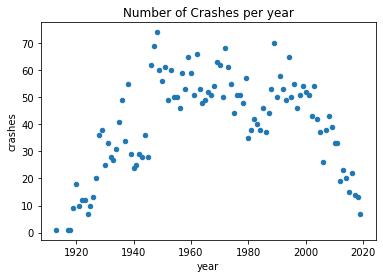

In [22]:
plane_crash_per_year.plot.scatter('year','crashes')
plt.title("Number of Crashes per year")
plt.show()

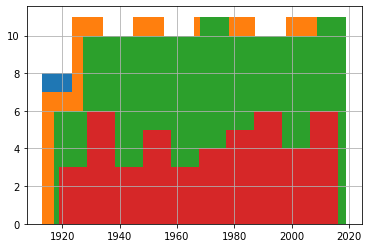

In [23]:
plane_crash_per_year['year'].hist()
total_crash_fat_per_year['year'].hist()
partial_crash_fat_per_year['year'].hist()
plane_crash_zerofat_per_year['year'].hist()
plt.show()


In [24]:
# num of people involved in plane accident and fatalities merge
plane_crash_aboard_fat_num = pd.merge(plane_crash_per_year,plane_crash_aboard_year, on='year',how='left')
plane_crash_aboard_fat_num = pd.merge(plane_crash_aboard_fat_num,plane_crash_fatalities_year, on='year',how='left')
print(plane_crash_aboard_fat_num.shape)
plane_crash_aboard_fat_num.head()

(104, 4)


,year,crashes,Aboard,Fatalities
0,1913,1,1.0,1.0
1,1917,1,16.0,14.0
2,1918,1,1.0,1.0
3,1919,9,20.0,23.0
4,1920,18,32.0,25.0


In [25]:
#Calcualte percentage of fatalities of everyone involved yearly
plane_crash_aboard_fat_num['percentage_fatalities'] = (plane_crash_aboard_fat_num['Fatalities'] / plane_crash_aboard_fat_num['Aboard'])*100
plane_crash_aboard_fat_num.tail()

,year,crashes,Aboard,Fatalities,percentage_fatalities
99,2015,15,652.0,615.0,94.325153
100,2016,22,881.0,493.0,55.959137
101,2017,14,119.0,88.0,73.949580
102,2018,13,898.0,533.0,59.354120
103,2019,7,287.0,249.0,86.759582


In [26]:
#Merge all dataframe into one with fatalties #, number of crashes where fataliteis where total 'Total_fatalties, 
#Number of crashes where fatalties where partial 'partial_fatalities'
#number of crashes where zero fataltieies 'zero_fatalities
plane_crash_yearly = pd.merge(plane_crash_aboard_fat_num,total_crash_fat_per_year,on='year',how='inner')
plane_crash_yearly = pd.merge(plane_crash_yearly,partial_crash_fat_per_year,on='year',how='inner')
plane_crash_yearly = pd.merge(plane_crash_yearly,plane_crash_zerofat_per_year,on='year',how='inner')
print(plane_crash_yearly.shape)
plane_crash_yearly.head()

(44, 8)


,year,crashes,Aboard,Fatalities,percentage_fatalities,total_fatalities,partial_fatalities,zero_fatalities
0,1926,13,63.0,36.0,57.142857,10,3,1
1,1927,20,69.0,52.0,75.362319,16,3,1
2,1932,28,86.0,73.0,84.883721,22,6,1
3,1933,27,161.0,133.0,82.608696,17,10,1
4,1935,41,305.0,242.0,79.344262,26,14,2


In [27]:
plane_crash_yearly.describe()

,year,crashes,Aboard,Fatalities,percentage_fatalities,total_fatalities,partial_fatalities,zero_fatalities
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1971.863636,44.409091,1435.227273,941.250000,67.026988,26.636364,17.590909,1.500000
std,27.478187,13.625076,862.522824,590.865905,11.608036,8.181348,6.714504,0.698836
min,1926.000000,13.000000,63.000000,36.000000,35.761589,10.000000,3.000000,1.000000
25%,1948.500000,37.750000,714.500000,477.250000,59.650712,20.000000,14.000000,1.000000
50%,1973.500000,48.500000,1446.000000,1026.000000,67.544570,28.500000,19.000000,1.000000
75%,1993.250000,53.000000,1988.250000,1254.250000,75.725071,32.000000,22.000000,2.000000
max,2016.000000,69.000000,3245.000000,2527.000000,84.883721,42.000000,32.000000,3.000000


#Visualization to check and Export

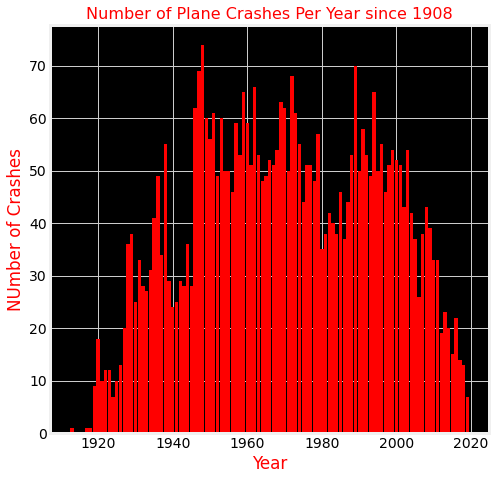

In [28]:
#Visualization 1, Number of Crashes per year,to be saved to blog Post
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
fig.patch.set_facecolor('white')

ax.width = 500
ax.height= 500
ax.set_title("Number of Plane Crashes Per Year since 1908",fontsize='16',color='red')
ax.set_xlabel("Year",color='red')
ax.set_ylabel("NUmber of Crashes",color='red')
ax.bar(x=plane_crash_per_year['year'],height=plane_crash_per_year['crashes'],width=0.9,color='red')

ax.set_facecolor('black')
plt.show()

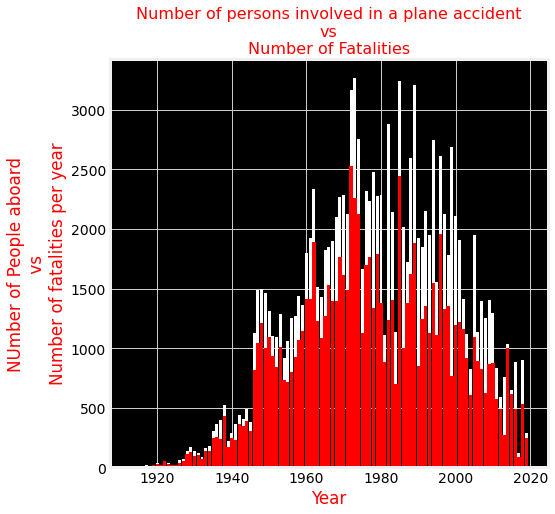

In [29]:
#Visualization check of data 
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
fig.patch.set_facecolor('white')

ax.width = 500
ax.height= 500
ax.set_title("Number of persons involved in a plane accident\nvs\nNumber of Fatalities",fontsize='16',color='red')
ax.set_xlabel("Year",color='red')
ax.set_ylabel("NUmber of People aboard\n vs \nNumber of fatalities per year",color='red')
ax.bar(x=plane_crash_aboard_fat_num['year'],height=plane_crash_aboard_fat_num['Aboard'] ,color='white')
ax.bar(x=plane_crash_aboard_fat_num['year'],height=plane_crash_aboard_fat_num['Fatalities'],width=0.9,color='red')

ax.set_facecolor('black')
plt.show()

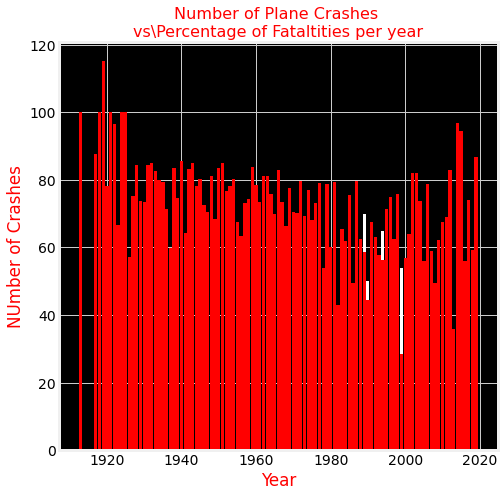

In [30]:
#More visualization check 
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
fig.patch.set_facecolor('white')

ax.width = 500
ax.height= 500
ax.set_title("Number of Plane Crashes \nvs\Percentage of Fataltities per year",fontsize='16',color='red')
ax.set_xlabel("Year",color='red')
ax.set_ylabel("NUmber of Crashes",color='red')
ax.bar(x=plane_crash_aboard_fat_num['year'],height=plane_crash_aboard_fat_num['crashes'] ,color='white')
ax.bar(x=plane_crash_aboard_fat_num['year'],height=plane_crash_aboard_fat_num['percentage_fatalities'],width=0.9,color='red')

ax.set_facecolor('black')
plt.show()

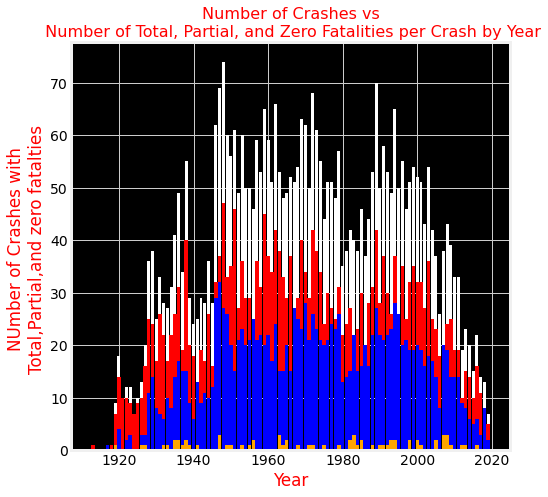

In [31]:
#More visualization check 
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
fig.patch.set_facecolor('white')

ax.width = 500
ax.height= 500
ax.set_title("Number of Crashes vs\n Number of Total, Partial, and Zero Fatalities per Crash by Year",fontsize='16',color='red')
ax.set_xlabel("Year",color='red')
ax.set_ylabel("NUmber of Crashes with \nTotal,Partial,and zero fatalties ",color='red')
ax.bar(x=plane_crash_per_year['year'],height=plane_crash_per_year['crashes'] ,color='white')
ax.bar(x=total_crash_fat_per_year['year'],height=total_crash_fat_per_year['total_fatalities'],width=0.9,color='red')

ax.bar(x=partial_crash_fat_per_year['year'],height=partial_crash_fat_per_year['partial_fatalities'],width=0.9,color='blue')
ax.bar(x=plane_crash_zerofat_per_year['year'],height=plane_crash_zerofat_per_year['zero_fatalities'],width=0.9,color='orange')
ax.set_facecolor('black')
fig.show()

#Visualization code to export to blogpost

In [32]:
#Crashes BarCHart
crashes_figure = px.bar(plane_crash_per_year, x="year", y="crashes", title="Number of Plane Crashes Per Year",color='crashes')
crashes_figure.update_layout(xaxis_title = "Year",yaxis_title="Number of Crashes", title="Number of Plane Crashes 1908 - 2019")
crashes_figure.show()

In [33]:
#Crashes BarCHart
crashes_figure_scatter = px.scatter(plane_crash_per_year, x="year", y="crashes", title="Number of Plane Crashes Per Year")
crashes_figure_scatter.update_layout(xaxis_title = "Year",yaxis_title="Number of Crashes", title="Number of Plane Crashes 1908 - 2019")
crashes_figure_scatter.show()

In [34]:
#Fatalities barchart
crash_fatalities = px.bar(plane_crash_fatalities_year, x="year", y="Fatalities", title="Number of Plane Crashes Per Year",color='Fatalities')
crash_fatalities.update_layout(xaxis_title = "Year",yaxis_title="Number of Fatalities", title="Number of Plane Crashes Fatalities 1908 - 2019")
crash_fatalities.show()

In [35]:
#Aboard vs Fatalitie barchart comparison
aboard_vs_fatalties = go.Figure(data=[
    go.Bar(name='# of people involved in accident per year', x=plane_crash_aboard_fat_num['year'], y=plane_crash_aboard_fat_num['Aboard']),
    go.Bar(name='# of Fatalities Per year from those involved', x=plane_crash_aboard_fat_num['year'], y=plane_crash_aboard_fat_num['Fatalities'])
])
# Change the bar mode
aboard_vs_fatalties.update_layout(legend_orientation='h', barmode='group',title="People Involved in Plane Crashes vs Fatalties per year",xaxis_title="Year",yaxis_title="Number of people")
aboard_vs_fatalties.show()

In [36]:
#Complete Comparison
crashes_vs_type_fatalalities = go.Figure(data=[
    
    
    
    go.Bar(name='# of Zero Fatalties on Crashes per year', x=plane_crash_zerofat_per_year['year'], y=plane_crash_zerofat_per_year['zero_fatalities']),
    go.Bar(name='# of Partial Fatalities on Crashes per year', x=partial_crash_fat_per_year['year'], y=partial_crash_fat_per_year['partial_fatalities']),
    go.Bar(name='# of Total Fatalities on Crashes per year', x=total_crash_fat_per_year['year'], y=total_crash_fat_per_year['total_fatalities']),
    go.Bar(name='# of Crashes per year', x=plane_crash_per_year['year'], y=plane_crash_per_year['crashes'])
])
# Change the bar mode
crashes_vs_type_fatalalities.update_layout(legend_orientation="h", barmode='stack',title="Number of Crashes vs Number of Total, Partial, and Zero Fatalities per Crash by Year",xaxis_title="Year",yaxis_title="Number of people and Crashes")


crashes_vs_type_fatalalities.show()

In [37]:
#Donut chart
labels = plane_crash_per_year['year'].value_counts().index
values = total_crash_fat_per_year['total_fatalities'].value_counts().values

# Use `hole` to create a donut-_counlike pie chart
donut = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
donut.update_layout(legend_orientation="h",title="Most Total Fatalities from 1908 - 2019")

donut.show()

#Code to download Charts

In [38]:
#Link to Donut Chart
py.plot(donut, filename = 'donut', auto_open=True) 

'https://plotly.com/~sberniz/2/'

In [39]:
#Link to crashes bar chart
py.plot(crashes_figure, filneme='crashes_year_bar',auto_open=True) 

'https://plotly.com/~sberniz/22/'

In [40]:
#link to crashes scatter plot
py.plot(crashes_figure_scatter,filname='crash_scatter',auto_open=True) 

'https://plotly.com/~sberniz/24/'

In [41]:
#Link to aboard vs fatalities group bar
py.plot(aboard_vs_fatalties,filename='aboardvsfatalities',auto_open=True)

'https://plotly.com/~sberniz/15/'

In [42]:
#Link to stack bar chart
py.plot(crashes_vs_type_fatalalities,'crashesvstypefatalities',auto_open=True)

'https://plotly.com/~sberniz/27/'

In [43]:
#HTML graphs for github 
pio.write_html(donut,file='donut.html',auto_open=False) #donut
pio.write_html(crashes_figure,file='crashes_year_bar.html',auto_open=False)
pio.write_html(crashes_figure_scatter,file='crash_year_scatter.html',auto_open=False)
pio.write_html(aboard_vs_fatalties,file='aboard_vs_ftalities.html',auto_open=False)
pio.write_html(crashes_vs_type_fatalalities,file='crashes_vs_type_fatalities.html',auto_open=False)
#End of Notebook

#Links

[Blog Post of this Data](https://medium.com/@sberniz/is-aviation-safer-than-before-579453a1da92)

[Portfolio Site](https://sberniz.github.io/)